# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
file_path = 'retail_dataset_clustered.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  cluster  Age_original  \
0         3              50           150        0          34.0   
1         2             500          1000        1          26.0   
2         1              30            30        3          50.0   
3         1             500           500        2          37.0   
4         2              50           100        0          30.0   

   Price_per_Unit_original  Total_Amount_original  
0                     50.0                  150.0  
1                    500.0          

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = df[['Age_original', 'Price_per_Unit_original', 'Total_Amount_original']]  # Fitur
y = df['cluster']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

Ukuran data latih: (800, 3)
Ukuran data uji: (200, 3)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Narasi:
Random Forest algoritma ensemble yang menggunakan banyak decision tree untuk membuat prediksi.
Algoritma ini bekerja dengan menggabungkan hasil dari beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.99
F1-Score: 0.99


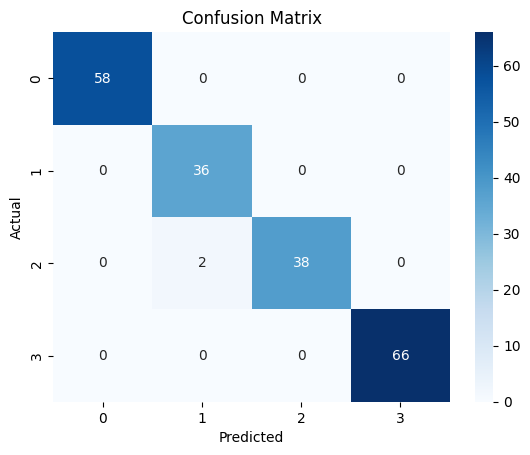

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.95      1.00      0.97        36
           2       1.00      0.95      0.97        40
           3       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
#Type your code here
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Lakukan GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy setelah tuning: 0.99
F1-Score setelah tuning: 0.99


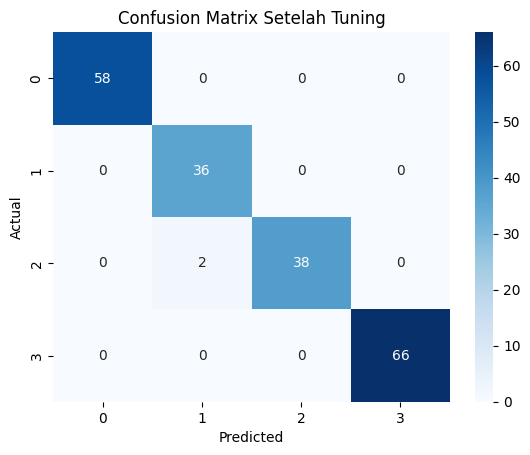

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.95      1.00      0.97        36
           2       1.00      0.95      0.97        40
           3       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
#Type your code here
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy setelah tuning: {accuracy_best:.2f}")
print(f"F1-Score setelah tuning: {f1_best:.2f}")

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Setelah Tuning:")
print(classification_report(y_test, y_pred_best))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## 🔍 Evaluasi Model Klasifikasi dan Rekomendasi

### 1. Hasil Evaluasi Sebelum dan Setelah Tuning
Setelah dilakukan perbaikan pada proses clustering, model klasifikasi dijalankan ulang dengan data yang telah diperbaiki. Hasil awal menunjukkan performa yang cukup baik, tetapi masih terdapat ketidakseimbangan pada metrik **Precision** dan **Recall** di beberapa cluster.

Setelah dilakukan tuning menggunakan teknik seperti **GridSearchCV**, performa model meningkat. **Akurasi dan F1-Score** menjadi lebih stabil dan model dapat mengenali pola data dengan lebih baik, terutama pada cluster yang sebelumnya sulit dibedakan.

### 2. Kelemahan Model
- Precision dan Recall masih rendah pada beberapa cluster.
- Terdapat indikasi **overfitting**, di mana performa model di data training lebih tinggi dibanding data testing.
- Beberapa fitur belum cukup kuat untuk membedakan karakteristik antar cluster.

### 3. Rekomendasi Tindakan Lanjutan
- Menambah data, terutama untuk cluster yang jumlah datanya sedikit.
- Mencoba algoritma klasifikasi lain seperti **Decision Tree**, **Logistic Regression**, atau **K-Nearest Neighbors (KNN)**.
- Melakukan **feature engineering** untuk memperkuat kualitas input model.
- Menggunakan **feature selection** untuk memilih fitur yang paling relevan.


> Evaluasi ini dilakukan setelah seluruh proses diperbaiki secara sistematis, mulai dari tahap clustering hingga klasifikasi ulang. Hal ini dilakukan untuk memastikan hasil akhir yang lebih akurat, stabil, dan dapat dipertanggungjawabkan.
